# Welcome to Full Stack Machine Learning's Week 4 Project!

In the final week, you will return to the workflow you built last week on the [taxi dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). 

## Task 1: Deploy the champion
Use what you have learned in the last two weeks to make necessary modifications and to deploy your latest version of the `TaxiFarePrediction` flow to Argo. Use `--branch champion` to denote this deployment as the champion model.

## Task 2: Build the challenger
Develop a second model, by using the same `TaxiFarePrediction` architecture. Then, deploy the flow to Argo as the `--branch challenger`. 
<br>
<br>
Hint: Modify the `linear_model` step. 
<br>
Bonus: Write a paragraph summary of how you developed the second model and tested it before deploying the challenger flow. Let us know in Slack what you found challenging about the task? 

## Task 3: Analyze the results
Return to this notebook, and read in the results of the challenger and champion flow using the Metaflow Client API.
<br><br>

#### Questions
- Does your model perform better on the metrics you selected? 
- Think about your day job, how would you go about assessing whether to roll forward the production "champion" to your new model? 
    - What gives you confidence one model is better than another?
    - What kinds of information do you need to monitor to get buy-in from stakeholders that model A is preferable to model B?  

In [5]:
from metaflow import namespace, Metaflow, Flow

In [6]:
namespace(None)
Metaflow().flows

[Flow('HelloFlow'),
 Flow('Template_Flow'),
 Flow('TFlow1'),
 Flow('TFlow3'),
 Flow('TFlow2'),
 Flow('TFlow4'),
 Flow('TFlow5'),
 Flow('RF_Flow'),
 Flow('BSTFlow'),
 Flow('NNFlow'),
 Flow('BaselineNLPFlow'),
 Flow('Branch_Flow'),
 Flow('BaselineChallenge'),
 Flow('RF_Flow_cloud'),
 Flow('DivideByZeroFlow'),
 Flow('CatchDivideByZeroFlow'),
 Flow('Branch_Cloud_Flow'),
 Flow('TaxiFarePrediction'),
 Flow('TitanicSurvivalPredictor')]

In [14]:
flow = Flow('TaxiFarePrediction')
runs = list(flow.runs("project:markaward", "runtime:argo-workflows"))
for run in runs:
    print(run)
    print(run.tags)
    print("="*25)

Run('TaxiFarePrediction/argo-markaward.prod.challenger.taxifareprediction-n5m6d')
frozenset({'project:markaward', 'metaflow_version:2.10.6+ob(v1)', 'project_branch:prod.challenger', 'python_version:3.9.18', 'production:mfprj-g5j37hw2j3s5z3rm-0-vxzm', 'runtime:argo-workflows'})
Run('TaxiFarePrediction/argo-markaward.prod.champion.taxifareprediction-z6cpj')
frozenset({'project:markaward', 'metaflow_version:2.10.6+ob(v1)', 'python_version:3.9.18', 'project_branch:prod.champion', 'production:mfprj-x4afnn7xjopz6fmy-0-hwuj', 'runtime:argo-workflows'})
Run('TaxiFarePrediction/argo-markaward.prod.champion.taxifareprediction-p25h4')
frozenset({'project:markaward', 'metaflow_version:2.10.6+ob(v1)', 'python_version:3.9.18', 'project_branch:prod.champion', 'production:mfprj-x4afnn7xjopz6fmy-0-hwuj', 'runtime:argo-workflows'})


In [28]:
from collections import defaultdict
import pandas as pd
import seaborn as sns

data = defaultdict(list)
for run in runs:
    for score in run.data.scores:
        data["score"].append(score)
        data["run_id"].append(run.id)
        data["branch"].append("challenger" if "challenger" in run.id else "champion")
df = pd.DataFrame(data)
df.head()

,score,run_id,branch
0,0.896306,argo-markaward.prod.challenger.taxifarepredict...,challenger
1,0.895125,argo-markaward.prod.challenger.taxifarepredict...,challenger
2,0.898055,argo-markaward.prod.challenger.taxifarepredict...,challenger
3,0.891685,argo-markaward.prod.challenger.taxifarepredict...,challenger
4,0.892686,argo-markaward.prod.challenger.taxifarepredict...,challenger


<AxesSubplot:xlabel='score', ylabel='run_id'>

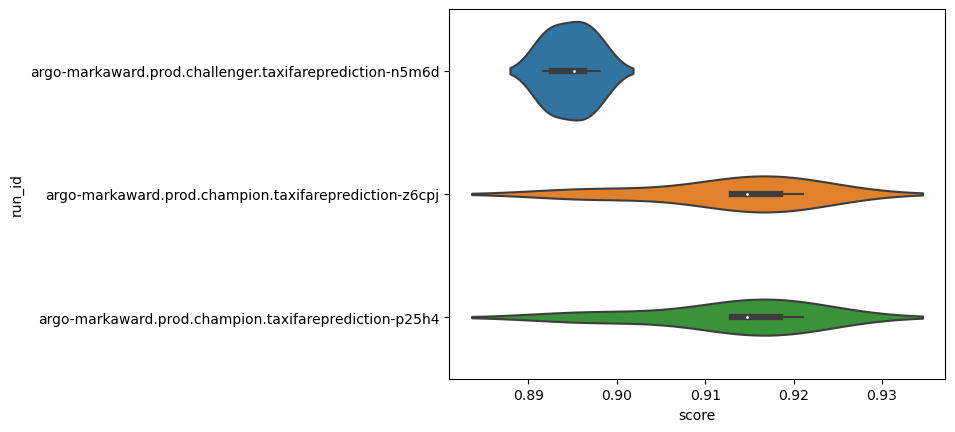

In [29]:
sns.violinplot(data=df, x="score", y="run_id")

<AxesSubplot:xlabel='score', ylabel='branch'>

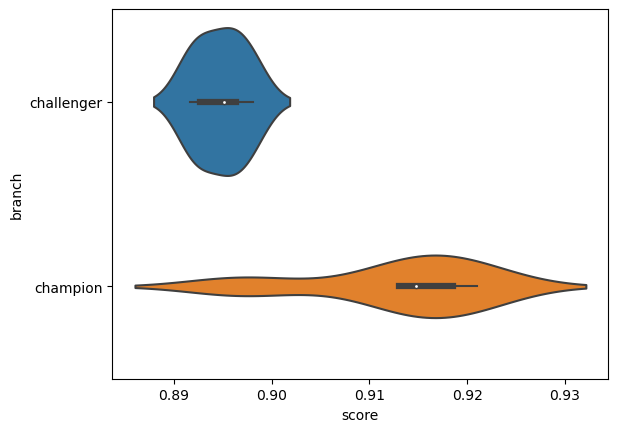

In [30]:
sns.violinplot(data=df, x="score", y="branch")

## CONGRATULATIONS! 🎉✨🍾
If you made it this far, you have completed the Full Stack Machine Learning Corise course. 
We are so glad that you chose to learn with us, and hope to see you again in future courses. Stay tuned for more content and come join us in [Slack](http://slack.outerbounds.co/) to keep learning about Metaflow!